<a href="https://colab.research.google.com/github/marcelozanchetta/EDS104/blob/main/Lab6_Atividade_Dados_Exploratorios_Agrupamento_Hierarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratório 6 - Atividade**




Os algoritmos hierárquicos produzem uma sequência de partições aninhadas, cada uma contendo uma quantidade diferente de grupos. Os algoritmos podem ser defindos nas seguintes abordagens:

1. Aglomerativa: o algoritmo inicia com n grupos, cada um formado por
um objeto diferente do conjunto de dados. A cada passo, dois grupos mais
próximos, com base em algum critério pré-estabelecido, são unidos. O
procedimento é repetido até que reste apenas um único grupo contendo todos os
objetos.
2. Divisiva: o algoritmo inicia com apenas um grupo contendo todos os
objetos. A cada etapa, algum dos grupos é dividido em dois novos grupos, segundo alguma regra definida. Todo o procedimento é realizado até que
sejam formados n grupos, cada um contendo apenas um objeto do conjunto de da-
dos.

Essa atividade explora algoritmos hierárquicos em dados com a Linguagem Python. **Essa atividade será desenvolvida em grupo com  três estudantes.**

# **Algoritmo Hierárquico**

Vamos analisar o uso de algoritmos de agrupamento hierárquico fornecidos pela biblioteca Python scipy:
*  link único (MIN),
*  link completo (MAX),
*  média do grupo.

Aqui vamos explorar a aplicação de agrupamento hierárquico ao conjunto de dados de vertebrados. O conjunto de dados está disponível no github.

In [ ]:
# carregue os dados para o Colab
# vertebratep.csv
import pandas as pd
# detectar automaticamente o cabeçalho 'infer'.
data = pd.read_csv('/content/drive/MyDrive/Dados_Exploratorios_dataset-cvs/datasets/vertebratep.csv',header='infer')
data

,Nome,Corpo Quente,Parto,Aquatico,Aereo,Pernas,Hiberna,Classe
0,Humano,1,1,0,0,1,0,mamíferos
1,Python,0,0,0,0,0,1,répteis
2,Salmão,0,0,1,0,0,0,peixes
3,Baleia,1,1,1,0,0,0,mamíferos
4,Rã,0,0,1,0,1,1,anfíbios
5,Komodo,0,0,0,0,1,0,répteis
6,Morcego,1,1,0,1,1,1,mamíferos
7,Pombo,1,0,0,1,1,0,aves
8,Gato,1,1,0,0,1,0,mamíferos
9,Tubarão,0,1,1,0,0,0,peixes


---
# Link Único (MIN)
---

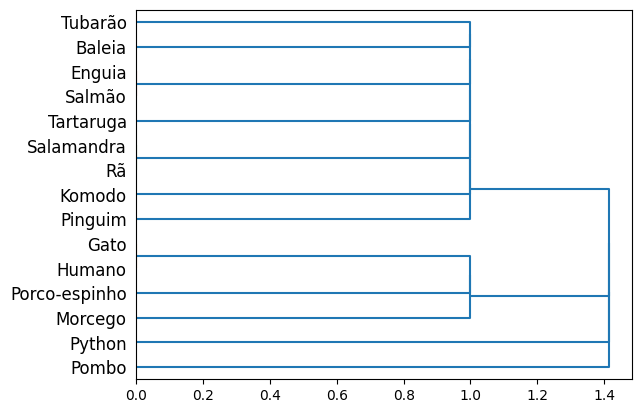

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

%matplotlib inline
#rótulos
names = data['Nome']
Y = data['Classe']
#retira colunas do dataset
X = data.drop(['Nome','Classe'],axis=1)
# aplica o algoritmo baseado na abordagem link único (simples)
Z = hierarchy.linkage(X.values, 'single', metric='euclidean')

# imprime do dendograma com as informações obtidas do agrupamento
dn = hierarchy.dendrogram(Z,labels=names.tolist(), orientation='right')

---
# Link Completo (MAX)
---

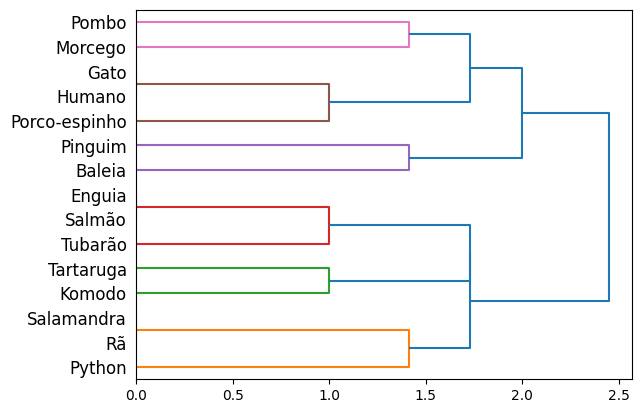

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

---
# Média do grupo
---

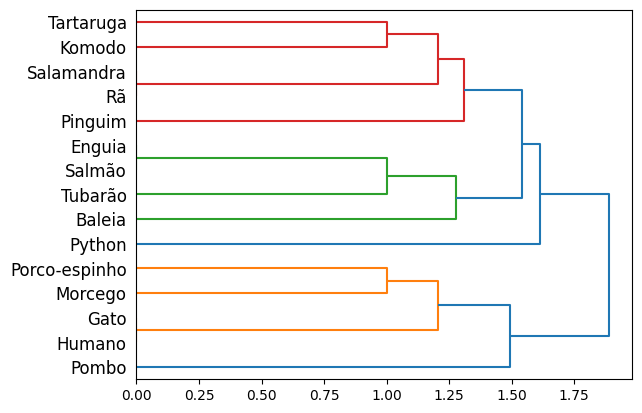

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

---
# **Exercício**
---

#**Conjunto de Dados de Vinho**

Esses dados são os resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 componentes encontrados em cada um dos três tipos de vinhos.

Os atributos são os seguintes (indicados por Riccardo Leardi):

* Álcool
* Ácido málico
* Cinza
* Alcalinidade das cinzas
* Magnésio
* Fenóis totais
* Flavanóides
* Fenóis não flavanóides
* Proantocianinas
* Intensidade da cor
* Cor
* OD280/OD315 de vinhos diluídos
* Prolina

Referência do Dataset: https://www.openml.org/search?type=data&status=active&id=43571


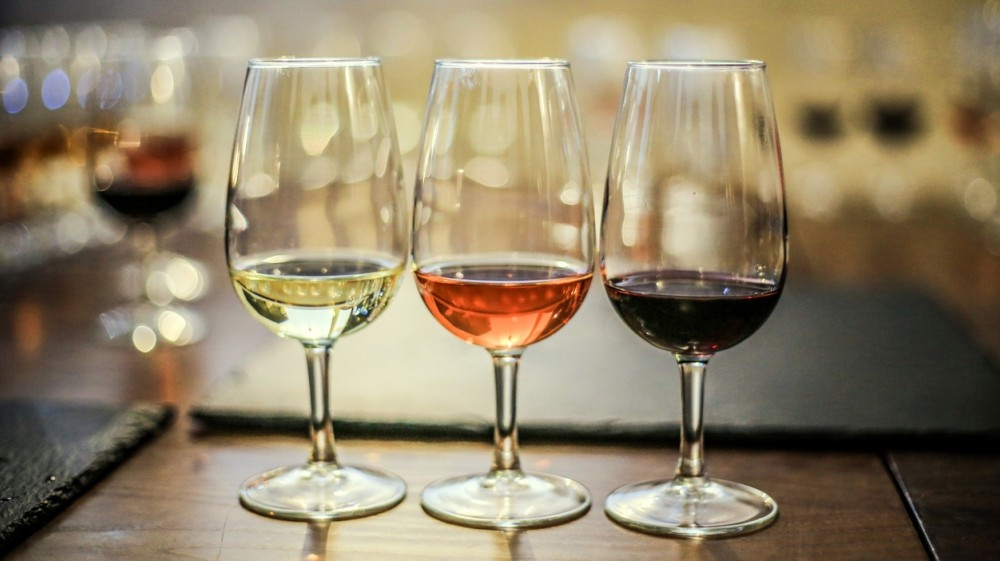


Fonte: https://www.embedded-robotics.com/wine-dataset-binary-classification/


Vamos importar as bibliotecas e os módulos necessários das bibliotecas Scikit-learn e SciPy:

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

Vamos carregar os dados:

In [ ]:
# Dataset
data = load_wine()
X = data.data

# Conversão para o DataFrame
wine_df = pd.DataFrame(X, columns=data.feature_names)

dfWinesShuffle = wine_df.sample(frac=1, random_state=7).reset_index(drop=True)

Mostrar as informações sobre as amostras do dataset

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Vamos observar o número de amostras e características de cada amostra:

In [ ]:
print(wine_df.shape)

(178, 13)


Agora vamos normalizar os dados para avaliação com o algoritmo:

In [ ]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine_df)

In [ ]:
# define a parametrização do k-means
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3, n_init=10, max_iter=50, random_state=1)
# calcula os clusters
k_means.fit(X_scaled)

labels = k_means.labels_
pd.DataFrame(labels)

,0
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


Essa função executa o agrupamento hierárquico em um conjunto de dados. O parâmetro, “ward” refere-se ao método de Ward, que minimiza a variação dentro de cada cluster durante o processo de clusterização.

In [ ]:
linked = linkage(X_scaled, method='ward')

Vamos plotar o resultado após aplicação do algoritmo. Podemos visualizar como cada um dos 178 objetos está agrupado em um único cluster. Embora isso seja aparentemente difícil de interpretar, ainda podemos ver que há três clusters diferentes.

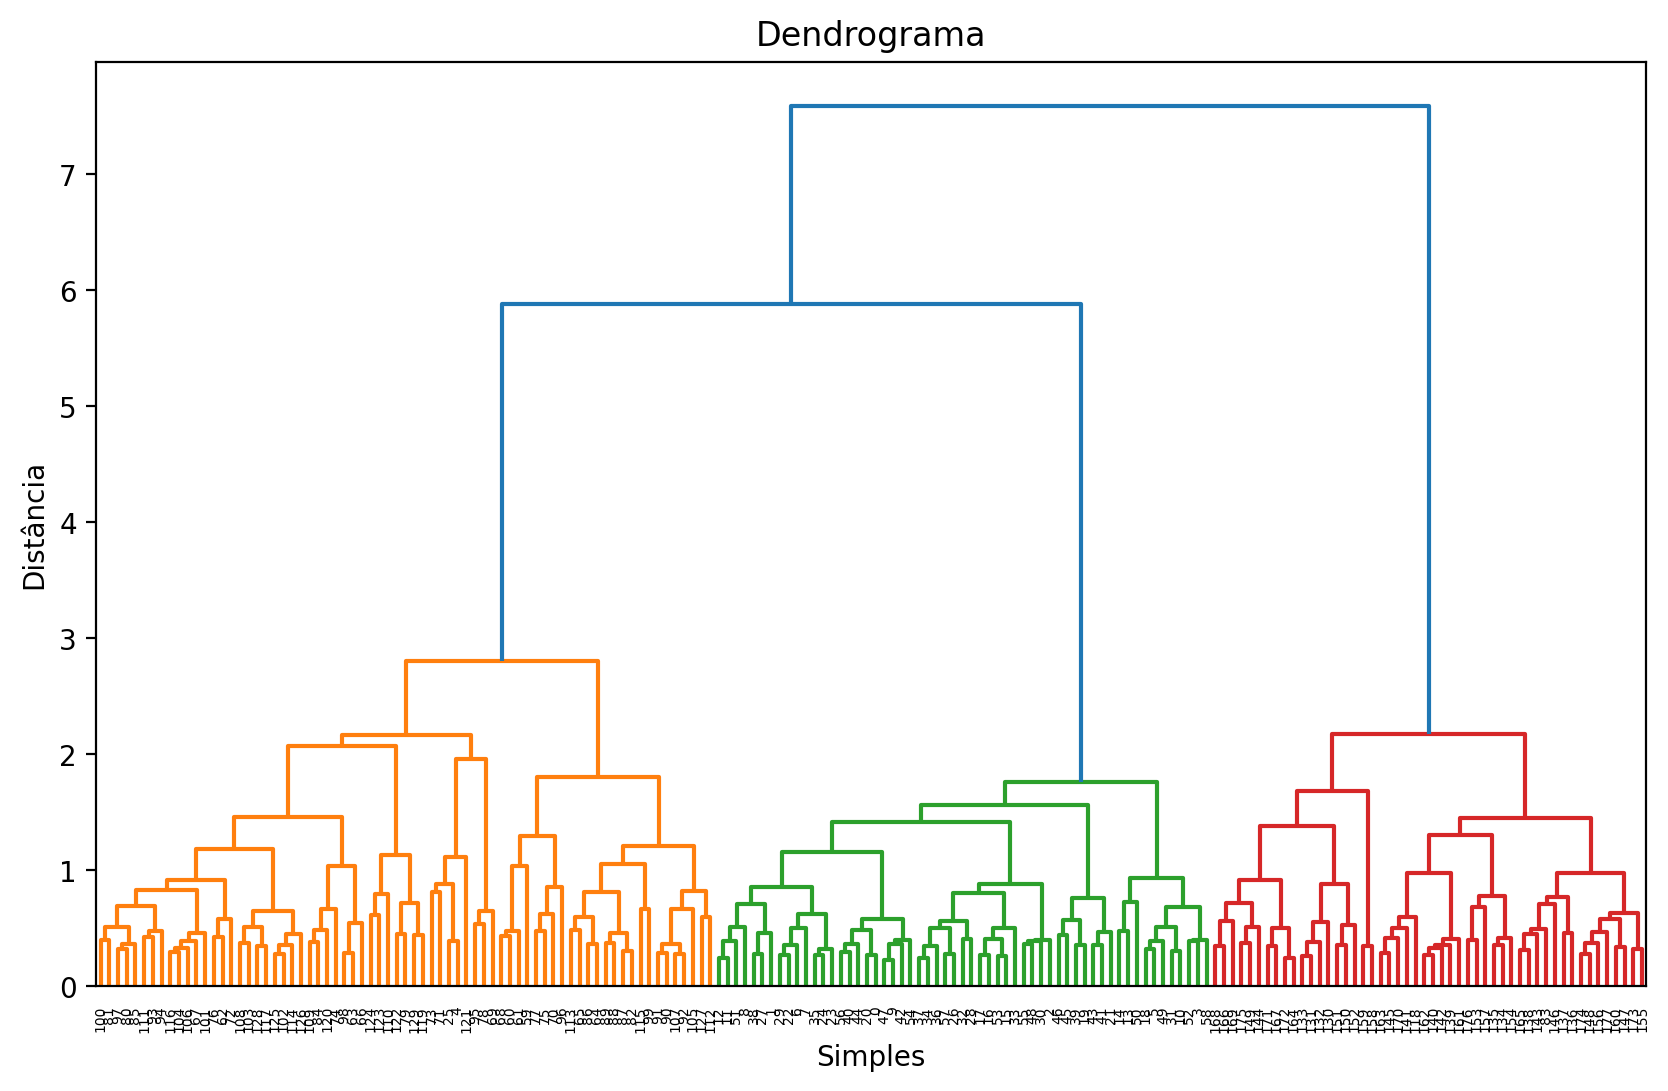

In [ ]:
# Dendrograma
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Simples')
plt.ylabel('Distância')
plt.show()

Uma forma de melhorar a avaliação é visualizar uma versão truncada que é mais fácil de interpretar e entender. Para truncar o dendrograma, podemos definir truncate_mode como “level” e p = 3.

In [ ]:
# Dendrograma
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Simples')
plt.ylabel('Distância')
plt.show()

No dendrograma acima, é possível ver que alguns pontos de dados, como 158 e 159, são representados individualmente. Enquanto outros são mencionados entre parênteses, esses não são pontos de dados individuais em que (k) indica um cluster com k amostras. O dendrograma nos ajuda a escolher o número ideal de clusters. Então, podemos observar onde a distância ao longo do eixo y aumenta, escolher truncar o dendrograma nesse ponto e usar a distância como limite para formar clusters. Para este exemplo, o número ideal de clusters é 3.

Quando o número de clusters estabelecido, podemos usar a distância correspondente ao longo do eixo y (uma distância limite). Vamos usar um threshold_distance de 3,5 (conforme inferido do dendrograma). Então, aplicamos o fcluster com o critério definido como “distance” para obter a atribuição de cluster para todos os pontos de dados:

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Escolha do limiar de distância baseado no dendrograma
threshold_distance = 3.5

# Obter o valor dos rótulos do cluster baseado no dendrograma
cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Atribuir rótulos de cluster ao DataFrame
wine_df['cluster'] = cluster_labels

In [ ]:
print(wine_df['cluster'])

0      2
1      2
2      2
3      2
4      3
      ..
173    1
174    1
175    1
176    1
177    1
Name: cluster, Length: 178, dtype: int32


Agora que cada ponto de dados foi atribuído a um cluster, podemos visualizar um subconjunto e suas atribuições de cluster. O gráfico de dispersão de dois dessas features são mapeadas com o cluster:


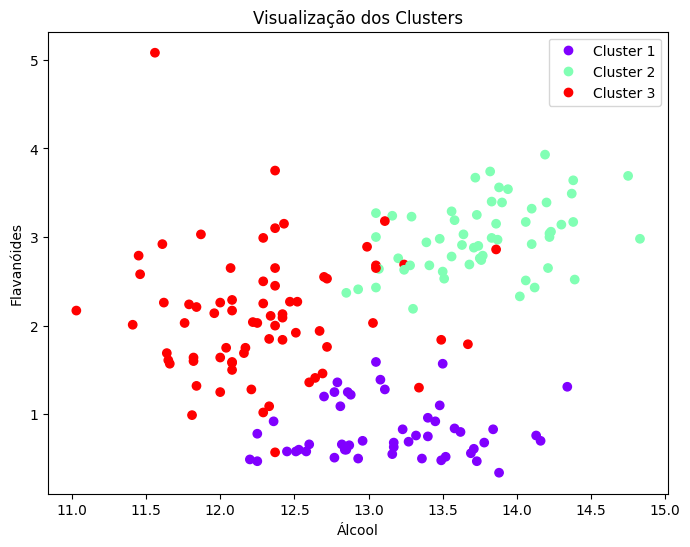

In [ ]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='rainbow')
plt.xlabel('Álcool')
plt.ylabel('Flavanóides')
plt.title('Visualização dos Clusters')

n_clusters = 3

# Legenda
legend_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

1. Faça uma comparação do comportamento dos dados com as modificações dos parâmetros em relação ao experimento inicial do algoritmo de agrupamento hierárquico. Busque variar aos parâmetros da técnica para esse experimento.

2. Vamos agora acrescentar ruídos sobre os dados. Crie um conjunto de dados com a presença de ruídos sobre as "features" usando os códigos. Avalie os desempenho do método com ruídos sobre as features individuais e sobre todo o conjunto de dados.

3. Implemente o algoritmo K-means e faça avaliação dos agrupamentos sobre esse conjunto de dados. Compare os grupos criados pelos algoritmos (particional e hierárquico).